In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### ***Data***

In [2]:
dt=pd.read_csv('heart.csv')
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dt.shape

(303, 14)

In [5]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dt.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
dt.duplicated().sum()

1

In [8]:
dt = dt.drop_duplicates()

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
dt.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
dt['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [13]:
dt.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [14]:
x=dt.drop(columns='target',axis=1)
y=dt['target']

In [15]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### ***Visualization***

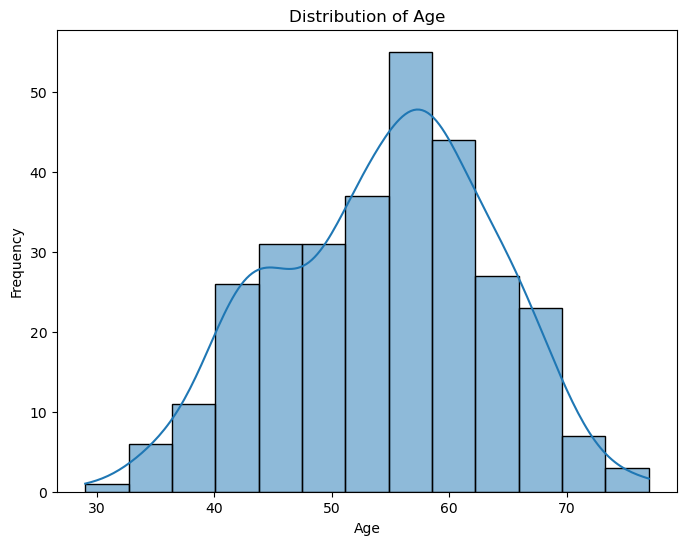

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(dt['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

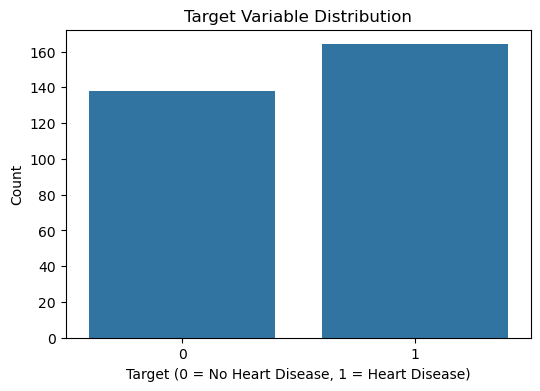

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=dt)
plt.title('Target Variable Distribution')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Count')
plt.show()

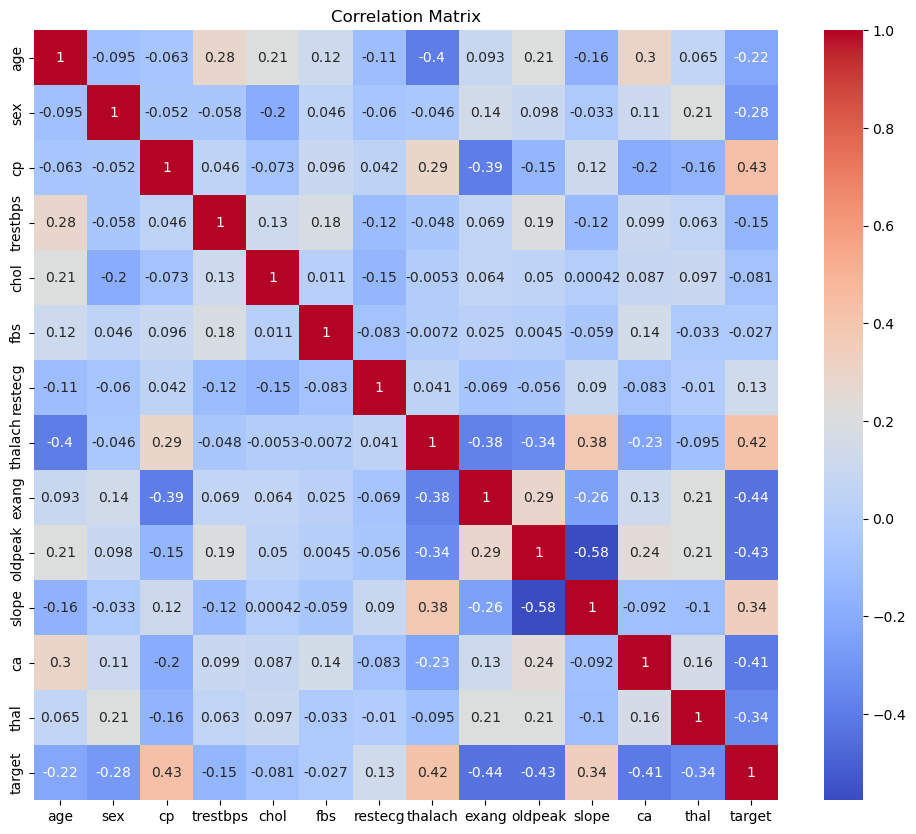

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

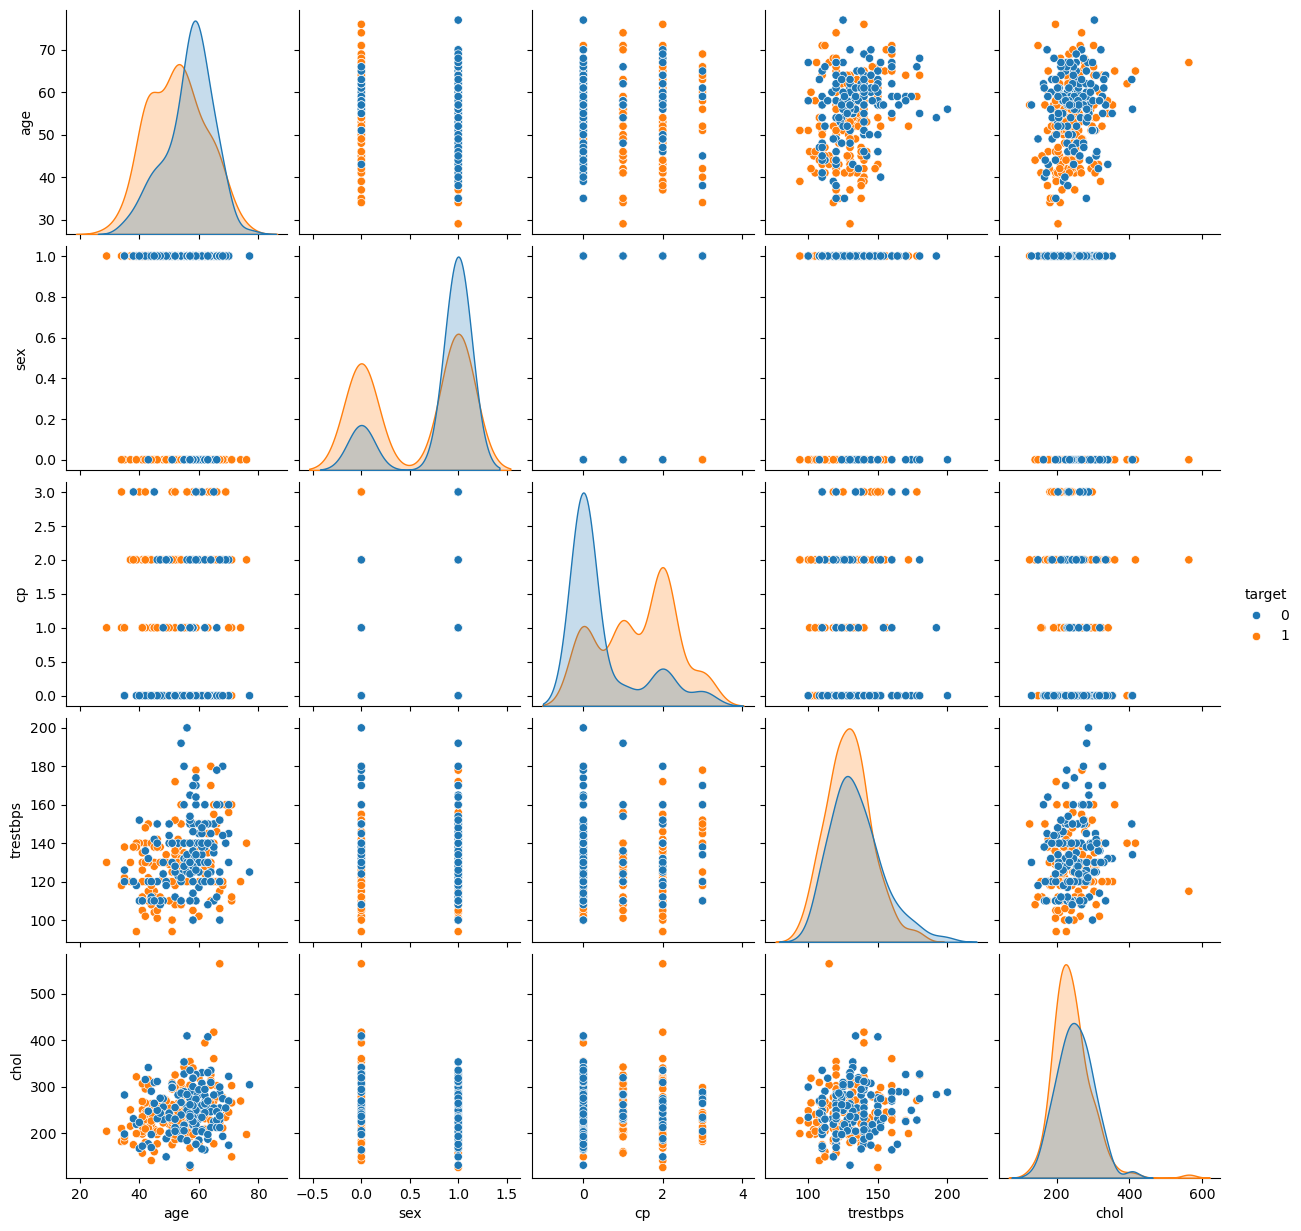

In [19]:
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'target']
sns.pairplot(dt[selected_features], hue='target')
plt.show()

### ***Train & Test Model***

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(x_train.shape)
print(x_test.shape)

(241, 13)
(61, 13)


### ***Training***



> Suppor Vector Machine



In [21]:
classifier= svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [22]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.8630705394190872
Accuracy score of the test data :  0.819672131147541




> **Logistic Regression**



In [23]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_x_train_prediction = log_model.predict(x_train)
log_training_data_accuracy = accuracy_score(log_x_train_prediction, y_train)
log_x_test_prediction = log_model.predict(x_test)
log_test_data_accuracy = accuracy_score(log_x_test_prediction, y_test)

In [24]:
print('Logistic Regression Accuracy score of the training data : ', log_training_data_accuracy)
print('Logistic Regression Accuracy score of the test data : ', log_test_data_accuracy)

Logistic Regression Accuracy score of the training data :  0.8464730290456431
Logistic Regression Accuracy score of the test data :  0.819672131147541




> **Decision Tree**



In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
dt_x_train_prediction = dt_classifier.predict(x_train)
dt_training_data_accuracy = accuracy_score(dt_x_train_prediction, y_train)
dt_x_test_prediction = dt_classifier.predict(x_test)
dt_test_data_accuracy = accuracy_score(dt_x_test_prediction, y_test)

In [26]:
print('Decision Tree Accuracy score of the training data : ', dt_training_data_accuracy)
print('Decision Tree Accuracy score of the test data : ', dt_test_data_accuracy)

Decision Tree Accuracy score of the training data :  1.0
Decision Tree Accuracy score of the test data :  0.7868852459016393




> **Random Forest**



In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

rf_x_train_prediction = rf_classifier.predict(x_train)
rf_training_data_accuracy = accuracy_score(rf_x_train_prediction, y_train)
rf_x_test_prediction = rf_classifier.predict(x_test)
rf_test_data_accuracy = accuracy_score(rf_x_test_prediction, y_test)

In [28]:
print('Random Forest Accuracy score of the training data : ', rf_training_data_accuracy)
print('Random Forest Accuracy score of the test data : ', rf_test_data_accuracy)

Random Forest Accuracy score of the training data :  1.0
Random Forest Accuracy score of the test data :  0.819672131147541




> **K-Nearest Neighbor(KNN)**


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(x_train, y_train)

knn_x_train_prediction = knn_classifier.predict(x_train)
knn_training_data_accuracy = accuracy_score(knn_x_train_prediction, y_train)
knn_x_test_prediction = knn_classifier.predict(x_test)
knn_test_data_accuracy = accuracy_score(knn_x_test_prediction, y_test)

In [30]:
print('KNN Accuracy score of the training data : ', knn_training_data_accuracy)
print('KNN Accuracy score of the test data : ', knn_test_data_accuracy)

KNN Accuracy score of the training data :  0.7925311203319502
KNN Accuracy score of the test data :  0.47540983606557374


### ***Evaluation***

In [31]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return cm, precision, recall, f1

svm_cm, svm_precision, svm_recall, svm_f1 = evaluate_model(classifier, x_test, y_test)
print("SVM:")
print("Confusion Matrix:\n", svm_cm)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

log_cm, log_precision, log_recall, log_f1 = evaluate_model(log_model, x_test, y_test)
print("\nLogistic Regression:")
print("Confusion Matrix:\n", log_cm)
print("Precision:", log_precision)
print("Recall:", log_recall)
print("F1-score:", log_f1)

dt_cm, dt_precision, dt_recall, dt_f1 = evaluate_model(dt_classifier, x_test, y_test)
print("\nDecision Tree:")
print("Confusion Matrix:\n", dt_cm)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

rf_cm, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_classifier, x_test, y_test)
print("\nRandom Forest:")
print("Confusion Matrix:\n", rf_cm)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

knn_cm, knn_precision, knn_recall, knn_f1 = evaluate_model(knn_classifier, x_test, y_test)
print("\nknearest Neighbour:")
print("Confusion Matrix:\n", knn_cm)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)

SVM:
Confusion Matrix:
 [[20  9]
 [ 2 30]]
Precision: 0.7692307692307693
Recall: 0.9375
F1-score: 0.8450704225352113

Logistic Regression:
Confusion Matrix:
 [[19 10]
 [ 1 31]]
Precision: 0.7560975609756098
Recall: 0.96875
F1-score: 0.8493150684931506

Decision Tree:
Confusion Matrix:
 [[23  6]
 [ 7 25]]
Precision: 0.8064516129032258
Recall: 0.78125
F1-score: 0.7936507936507936

Random Forest:
Confusion Matrix:
 [[21  8]
 [ 3 29]]
Precision: 0.7837837837837838
Recall: 0.90625
F1-score: 0.8405797101449275

knearest Neighbour:
Confusion Matrix:
 [[12 17]
 [15 17]]
Precision: 0.5
Recall: 0.53125
F1-score: 0.5151515151515151




> **HyperParameter Tuning**



In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

best_log_model = grid_search.best_estimator_
best_log_x_test_prediction = best_log_model.predict(x_test)
best_log_test_data_accuracy = accuracy_score(best_log_x_test_prediction, y_test)
print('Logistic Regression (tuned) Accuracy score of the test data : ', best_log_test_data_accuracy)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy score: 0.8421768707482993
Logistic Regression (tuned) Accuracy score of the test data :  0.8032786885245902


### ***Prediction Input***

In [33]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = best_log_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


### ***Saving Model***

In [34]:
import pickle
filename = 'heart_model.sav'
pickle.dump(classifier, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))